## Alternative Model (Preprocessing)
You need to run this before you run notebook 4b.

The wavs in your dataset will be converted to 9bit linear and 80-band mels.

In [18]:
cd /home/erogol/Projects/WaveRNN/

/home/erogol/Projects/WaveRNN


In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import math, pickle, os, glob
import numpy as np
from tqdm import tqdm_notebook as tqdm
from utils import *
from utils.dsp import *
from utils.display import *
import IPython.display as ipd
from multiprocessing import Pool

In [20]:
bits = 9
notebook_name = 'nb4'

In [21]:
# Point SEG_PATH to a folder containing your training wavs 
# Doesn't matter if it's LJspeech, CMU Arctic etc. it should work fine
SEG_PATH = '/home/erogol/Data/LJSpeech-1.1/' 
DATA_PATH = f'data/{notebook_name}/'
%mkdir -p $DATA_PATH

In [22]:
def get_files(path, extension='.wav') :
    filenames = []
    for filename in glob.iglob(f'{path}/**/*{extension}', recursive=True):
        filenames += [filename]
    return filenames

In [23]:
wav_files = get_files(SEG_PATH)

In [24]:
def convert_file(path) :
    wav = load_wav(path, encode=False)
    mel = melspectrogram(wav)
    quant = (wav + 1.) * (2**bits - 1) / 2
    return mel.astype(np.float32), quant.astype(np.int)

In [25]:
m, x = convert_file(wav_files[1])

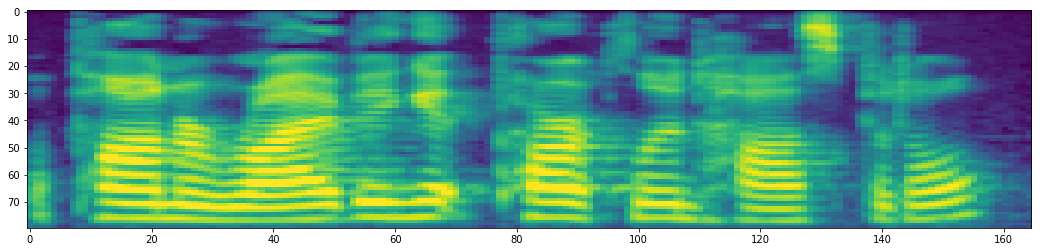

In [26]:
plot_spec(m)

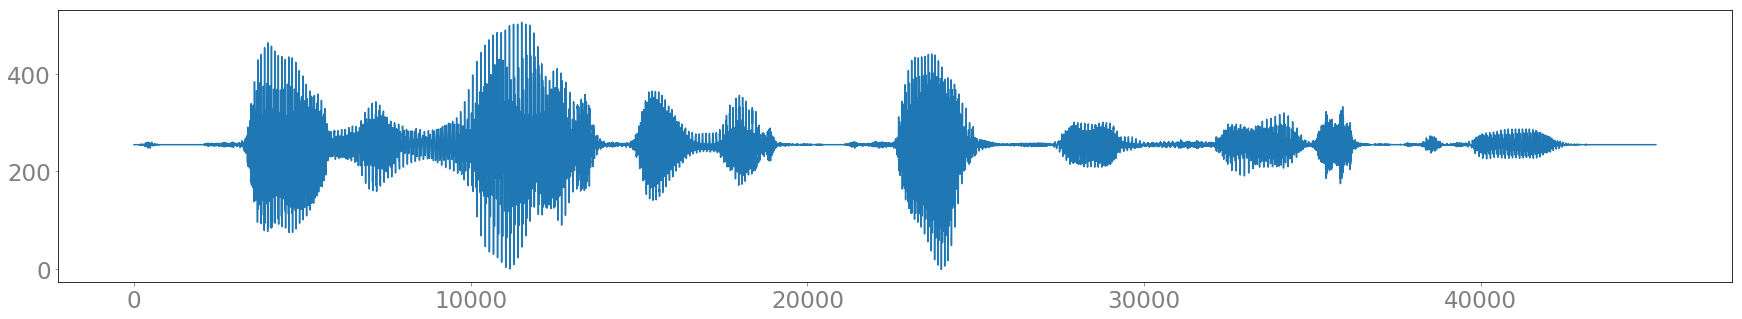

In [27]:
plot(x)

In [28]:
x = 2 * x / (2**bits - 1) - 1

In [29]:
librosa.output.write_wav(DATA_PATH + 'test_quant.wav', x, sr=sample_rate)
ipd.Audio(wav_files[1]) # load a local WAV file

In [30]:
QUANT_PATH = DATA_PATH + 'quant/'
MEL_PATH = DATA_PATH + 'mel/'
%mkdir -p $QUANT_PATH
%mkdir -p $MEL_PATH

In [31]:
wav_files[0].split('/')[-1][:-4]

'LJ039-0124'

In [32]:
def process_wav(wav_path):
    idx = wav_path.split('/')[-1][:-4]
    m, x = convert_file(wav_path)
    np.save(f'{MEL_PATH}{id}.npy', m)
    np.save(f'{QUANT_PATH}{id}.npy', x)
    return idx

In [ ]:
# This will take a while depending on size of dataset
with Pool(8) as p:
    dataset_ids = list(tqdm(p.imap(process_wav, wav_files), total=len(wav_files)))

In [ ]:
with open(DATA_PATH + 'dataset_ids.pkl', 'wb') as f:
    pickle.dump(dataset_ids, f)